<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



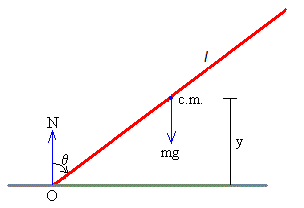


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint





---


\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}


\begin{equation}
\frac{d\theta}{dt} = {\omega}
\end{equation}

\begin{equation}
\frac{d\omega}{dt} = \left( \frac{\frac{2g}{l} - \left(\omega\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}



---



In [43]:
l=0.1
g=9.8
ti=0
w0=0
thetaini=np.pi/12
ts= np.linspace(0,10 , 1000)
vali=[thetaini,w0]

In [63]:
def DF(vars,t):
  x, w = vars
  return [w, (((2*g/l) - ((w**2) * np.cos(x))) / ((1/3) + np.sin(x)**2)) * np.sin(x)]

sol = odeint(DF,vali,ts)
thetas=sol[:,0]
def theta_max(sol,t):
  theta= thetas
  indice= np.argmax(theta>=np.pi/2)
  if theta[indice]>=np.pi/2:
    return sol[:indice +1 ], t[:indice+1]
  else:
    return sol,t
solucion_0_w, tiempo = theta_max(sol,ts)
thetas= solucion_0_w[:,0]
omegas= solucion_0_w[:,1]

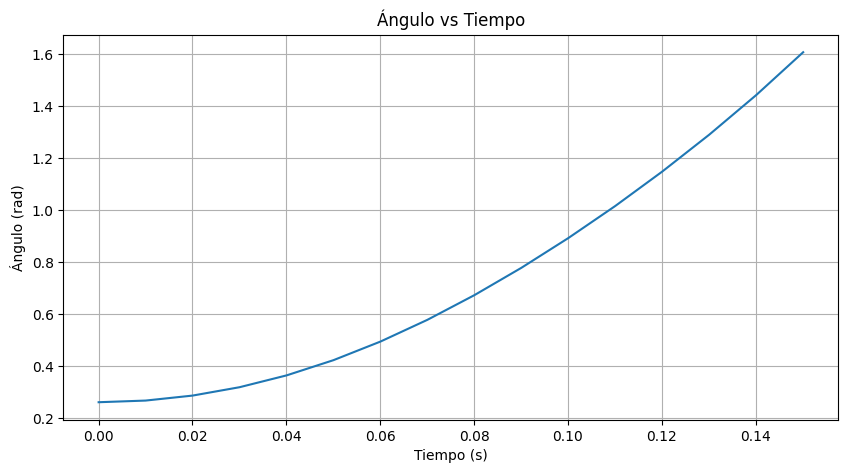

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(tiempo,thetas )
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo vs Tiempo')
plt.grid()
plt.show()

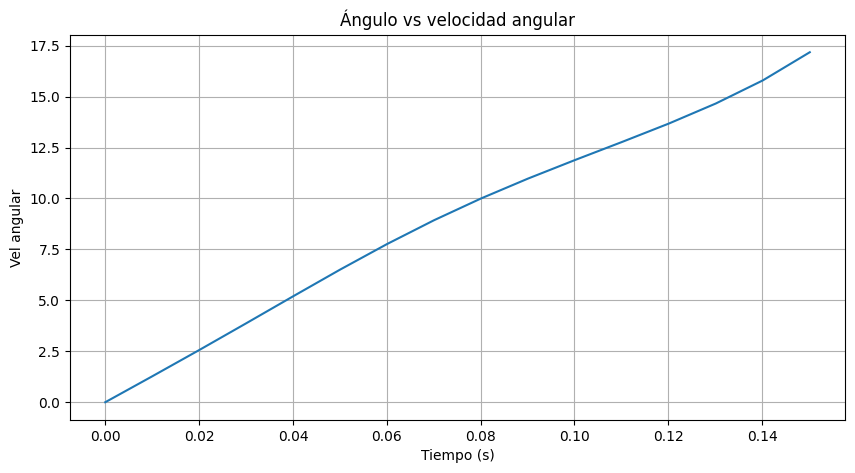

In [123]:
plt.figure(figsize=(10, 5))
plt.plot(tiempo, omegas)
plt.xlabel('Tiempo (s)')
plt.ylabel('Vel angular')
plt.title('Ángulo vs velocidad angular')
plt.grid()
plt.show()

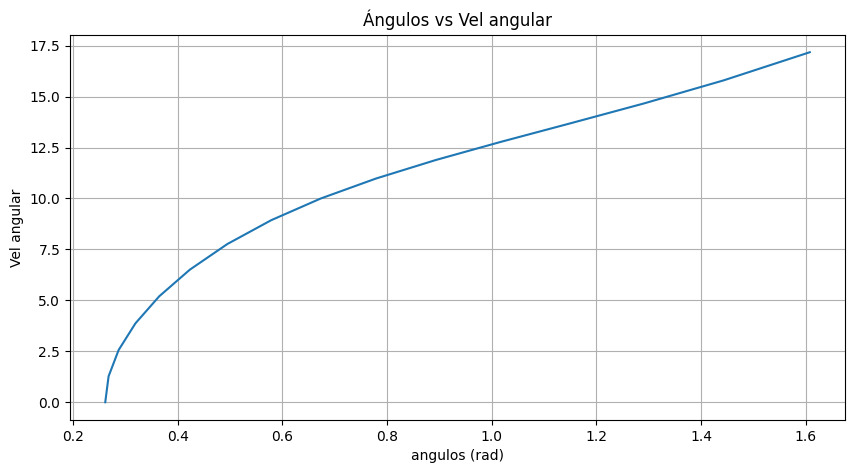

In [124]:
plt.figure(figsize=(10, 5))
plt.plot(thetas,omegas)
plt.xlabel('angulos (rad)')
plt.ylabel('Vel angular')
plt.title('Ángulos vs Vel angular')
plt.grid()
plt.show()


In [72]:
"""
3) Esta ecuación tiene respuesta valida desde el tiempo 0 hasta el tiempo que cae el lapiz, es decir :
"""
print(f'el tiempo final es de {tiempo[-1]} segundos')

el tiempo final es de 0.15015015015015015 segundos


:
4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.


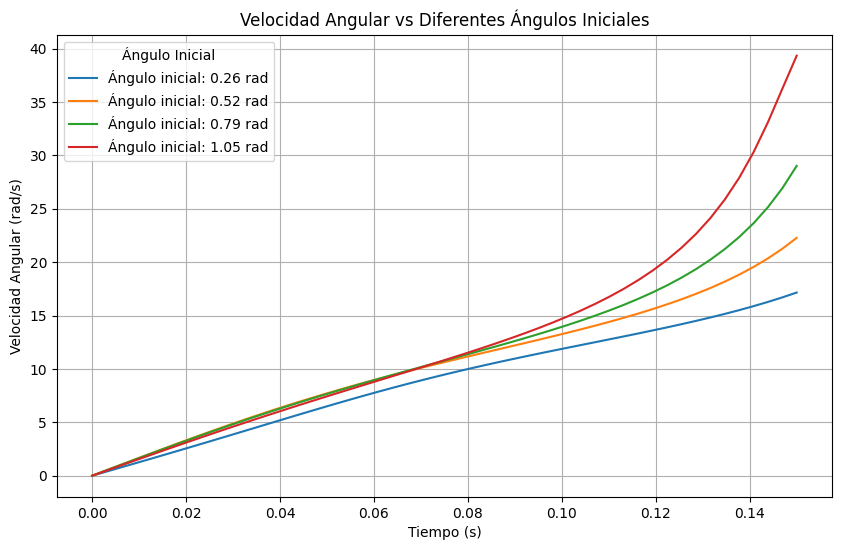

In [126]:
tss=np.linspace(0,0.15)
sol = odeint(DF,vali,ts)
ths=[np.pi/12,np.pi/6,np.pi/4,np.pi/3]
plt.figure(figsize=(10, 6))
for theta0 in ths:
    valis = [theta0, 0]
    sol = odeint(DF, valis, tss)
    plt.plot(tss, sol[:, 1], label=f'Ángulo inicial: {theta0:.2f} rad')

plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Diferentes Ángulos Iniciales')
plt.legend(title='Ángulo Inicial')
plt.grid()
plt.show()


6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

In [108]:
from scipy.integrate import quad

def tiempo_caida(theta0):
  T,_=quad(lambda x:(((1/3)+((np.sin(x))**2))/(np.cos(theta0)-np.cos(x)))**(1/2),theta0,np.pi/2)

  return (0.5)*((l/g)**(1/2))*T

for i in ths:
  print(f'el tiempo de caida para el angulo {i}rad es {tiempo_caida(i)}seg')


el tiempo de caida para el angulo 0.2617993877991494rad es 0.1479832354352146seg
el tiempo de caida para el angulo 0.5235987755982988rad es 0.12177877486181128seg
el tiempo de caida para el angulo 0.7853981633974483rad es 0.10332124464084698seg
el tiempo de caida para el angulo 1.0471975511965976rad es 0.08416005040768007seg


7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


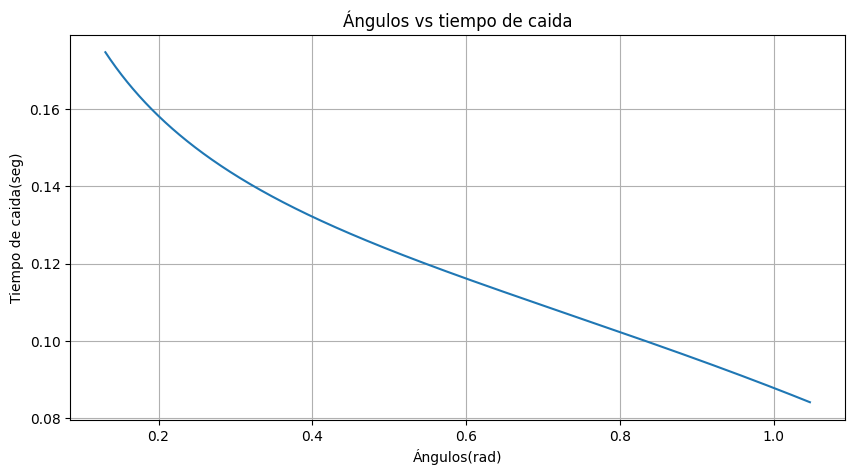

In [130]:
ths0=np.linspace(np.pi/24,np.pi/3,1000)
ang=[]
for a in ths0:
  tiemp= tiempo_caida(a)
  ang.append(tiemp)

plt.figure(figsize=(10, 5))
plt.plot(ths0,ang)
plt.xlabel('Ángulos(rad)')
plt.ylabel('Tiempo de caida(seg)')
plt.title('Ángulos vs tiempo de caida')
plt.grid()
plt.show()


## El tiempo de caida es mayor si el angulo inicial es menor